In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.chdir('/content/gdrive/MyDrive/Tomato disease detection')

In [4]:
# # Linking the notebook with the dataset from kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download -d emmarex/plantdisease

In [5]:
# Unzipping the dataset
#! unzip plantdisease.zip

In [6]:
# Changing the directory to the plant disease folder
os.chdir('/content/gdrive/MyDrive/Tomato disease detection/PlantVillage')

In [7]:
# Converting images to array
import cv2
from PIL import Image
default_image_size = tuple((32, 32))

def img_to_arr(image):
  image = image.resize((32,32),Image.ANTIALIAS)
  image = np.asarray(image).astype(np.float32)
  image = image.reshape(32, 32, 3)
  return image

In [8]:
img = Image.open(os.path.join('Tomato_Bacterial_spot','0a6d40e4-75d6-4659-8bc1-22f47cdb2ca8___GCREC_Bact.Sp 6247.JPG'))
image_array = img_to_arr(img)
image_array.shape

(32, 32, 3)

In [29]:
# Function to load images
images = []
cat = []
img_size = 32
def load_images_from_folder(folder):
  for filename in os.listdir(folder):
      img = cv2.imread(os.path.join(folder, filename))
      resized_arr = cv2.resize(img, (32, 32))
      if img is not None:
        images.append(resized_arr)
        cat.append(folder)
  return images, cat

In [34]:
# labels = ['Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_Late_blight','Tomato_Leaf_Mold',
#                  'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 
#                  'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 
#                  'Tomato_healthy']
# img_size = 32
# def get_data(data_dir):
#     data = [] 
#     for label in labels: 
#         path = os.path.join(data_dir, label)
#         class_num = labels.index(label)
#         for img in os.listdir(path):
#             try:
#                 img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
#                 resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
#                 data.append([resized_arr, class_num])
#             except Exception as e:
#                 print(e)
#     return np.array(data)

In [30]:
# Loading tomato images only

tomato_status = ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 
                 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
                 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'] 

root_dir = os.listdir('/content/gdrive/MyDrive/Tomato disease detection/PlantVillage')

for category in root_dir:
  if category in tomato_status:
    tomato_img, tomato_cat = load_images_from_folder(category)
    print(category)
    
    # tomato_img = tomato_img.append(images_tomato)
    # tomato_cat = tomato_cat.append(category)

Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_Late_blight
Tomato_Leaf_Mold
Tomato_Septoria_leaf_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato__Target_Spot
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato__Tomato_mosaic_virus
Tomato_healthy


In [35]:
tomato_cat = pd.Series(tomato_cat)
tomato_cat.unique()


array(['Tomato_Bacterial_spot', 'Tomato_Early_blight',
       'Tomato_Late_blight', 'Tomato_Leaf_Mold',
       'Tomato_Septoria_leaf_spot',
       'Tomato_Spider_mites_Two_spotted_spider_mite',
       'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
       'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'], dtype=object)

In [34]:
arr_image = np.reshape(tomato_img, (len(tomato_img),32,32,3))
arr_image.shape

(16011, 32, 32, 3)

In [36]:
# Encoding category names
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
enc_tomato_cat = le.fit_transform(tomato_cat)

In [37]:
len(tomato_cat), len(arr_image)

(16011, 16011)

In [40]:
# tomato_img = np.asarray(tomato_img, dtype='int32')

In [39]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(arr_image, enc_tomato_cat, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12808, 32, 32, 3), (3203, 32, 32, 3), (12808,), (3203,))

In [42]:

# # Training the model
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# model_list = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(),
#               SVC()]
# model_names = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier",
#                "Support Vector Classifier"]

# for i in range(len(model_list)):
#   y_pred = model_list[i].fit(X_train, y_train).predict(X_test)
#   print("Model: ", model_names[i], " has ", accuracy_score(y_pred, y_test)*100, "% accuracy")


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Activation, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

In [41]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [42]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the data
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255

In [46]:
X_train[1].shape

(32, 32, 3)

In [46]:
''' In this section we are going to apply convolutional neural networks in detecting objects and classifying their names '''
# Building a convolutional neural network without tuning hyperparameters
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # Applying dropout layer for each conv layer

model.add(Conv2D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # Applying dropout layer for each conv layer

model.add(Conv2D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # Applying dropout layer for each conv layer

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2)) # Applying dropout layer for each conv layer
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/50
129/129 [==============================] - 4s 21ms/step - loss: 1.9378 - accuracy: 0.3284 - val_loss: 1.3969 - val_accuracy: 0.5386
Epoch 2/50
129/129 [==============================] - 2s 17ms/step - loss: 1.1709 - accuracy: 0.6042 - val_loss: 0.8664 - val_accuracy: 0.7349
Epoch 3/50
129/129 [==============================] - 2s 16ms/step - loss: 0.8497 - accuracy: 0.7097 - val_loss: 0.6491 - val_accuracy: 0.7893
Epoch 4/50
129/129 [==============================] - 2s 15ms/step - loss: 0.6911 - accuracy: 0.7574 - val_loss: 0.5058 - val_accuracy: 0.8405
Epoch 5/50
129/129 [==============================] - 2s 16ms/step - loss: 0.5917 - accuracy: 0.7901 - val_loss: 0.6668 - val_accuracy: 0.7662
Epoch 6/50
129/129 [==============================] - 2s 16ms/step - loss: 0.5350 - accuracy: 0.8185 - val_loss: 0.4610 - val_accuracy: 0.8380
Epoch 7/50
129/129 [==============================] - 2s 15ms/step - loss: 0.4686 - accuracy: 0.8381 - val_loss: 0.3531 - val_accuracy: 0.8882

In [47]:
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('The model scored an accuracy of %.3f' % (acc * 100.0))

The model scored an accuracy of 96.410


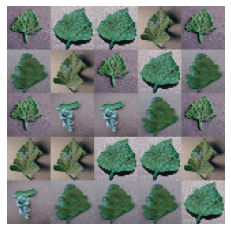

In [50]:
''' Visualizing the images in our dataset '''
# Function that displays cifar images
def display_cifar(images, size):
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)]) for i in range(size)])
    plt.imshow(im) 
    plt.show()

# Displaying some pictures
display_cifar(X_train[:5], 5)

In [51]:
# Saving the model
model.save('model.sav')

INFO:tensorflow:Assets written to: model.sav/assets
